# For-Hire Vehicle Trip Records Exploratory Data Analysis (EDA)

In [1]:
!python -V

Python 3.8.12


install some packages

In [2]:
!pip install seaborn matplotlib sklearn

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 3.2 MB/s eta 0:00:00m eta 0:00:010:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 MB 3.4 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 2.3 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 1.9 MB/s eta 0:00:00m eta 0:00:010:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.9/930.9 KB 2.2 MB/s eta 0:00:002.2 MB/s eta 0:00:01
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.0/31.0 MB 3.5 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=c88b23b5432f28b06a79b804e4192ccadbfed01231cde58bf51c3b055163574a
  Stored in directory: /home/desenfirma

In [3]:
import pandas as pd

In [4]:
import pickle

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

## Download the required data

In [7]:
!wget https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2021-01.parquet -c -O data/fhv_tripdata_2021-01.parquet

--2022-05-19 04:23:37--  https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2021-01.parquet
Resolving nyc-tlc.s3.amazonaws.com (nyc-tlc.s3.amazonaws.com)... 52.217.139.201
Connecting to nyc-tlc.s3.amazonaws.com (nyc-tlc.s3.amazonaws.com)|52.217.139.201|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11886281 (11M) [binary/octet-stream]
Saving to: ‘data/fhv_tripdata_2021-01.parquet’

data/fhv_tripdata_2 100%[===================>]  11.33M  1.63MB/s    in 7.0s    

2022-05-19 04:23:46 (1.63 MB/s) - ‘data/fhv_tripdata_2021-01.parquet’ saved [11886281/11886281]



In [8]:
!wget https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2021-02.parquet -c -O data/fhv_tripdata_2021-02.parquet

--2022-05-19 04:24:28--  https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2021-02.parquet
Resolving nyc-tlc.s3.amazonaws.com (nyc-tlc.s3.amazonaws.com)... 54.231.225.193
Connecting to nyc-tlc.s3.amazonaws.com (nyc-tlc.s3.amazonaws.com)|54.231.225.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10645466 (10M) [binary/octet-stream]
Saving to: ‘data/fhv_tripdata_2021-02.parquet’

data/fhv_tripdata_2 100%[===================>]  10.15M  1.44MB/s    in 14s     

2022-05-19 04:24:43 (725 KB/s) - ‘data/fhv_tripdata_2021-02.parquet’ saved [10645466/10645466]



In [9]:
!ls data/

fhv_tripdata_2021-01.parquet  fhv_tripdata_2021-02.parquet  README.md


## EDA and Preparation

In [16]:
df_2021_01 = pd.read_parquet('./data/fhv_tripdata_2021-01.parquet')

print(f"Columns: {df_2021_01.columns}")
df_2021_01.head()

Columns: Index(['dispatching_base_num', 'pickup_datetime', 'dropOff_datetime',
       'PUlocationID', 'DOlocationID', 'SR_Flag', 'Affiliated_base_number'],
      dtype='object')


,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037


In [17]:
df_2021_02 = pd.read_parquet('./data/fhv_tripdata_2021-02.parquet')

print(f"Columns: {df_2021_02.columns}")
df_2021_02.head()

Columns: Index(['dispatching_base_num', 'pickup_datetime', 'dropOff_datetime',
       'PUlocationID', 'DOlocationID', 'SR_Flag', 'Affiliated_base_number'],
      dtype='object')


,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00013,2021-02-01 00:01:00,2021-02-01 01:33:00,NaN,NaN,None,B00014
1,B00021,2021-02-01 00:55:40,2021-02-01 01:06:20,173.0,82.0,None,B00021
2,B00021,2021-02-01 00:14:03,2021-02-01 00:28:37,173.0,56.0,None,B00021
3,B00021,2021-02-01 00:27:48,2021-02-01 00:35:45,82.0,129.0,None,B00021
4,B00037,2021-02-01 00:12:50,2021-02-01 00:26:38,NaN,225.0,None,B00037


## Question 1
January records

In [20]:
print(f"Total records: {df_2021_01.shape[0]} row(s)")

Total records: 1154112 rows


## Question 2
Average duration of January records FHV

In [28]:
print(f"Is pickup_datetime has null: { df_2021_01['pickup_datetime'].isnull().values.any() } ")
print(f"Is dropoff_datetime has null: { df_2021_01['dropOff_datetime'].isnull().values.any() } ")

Is pickup_datetime has null: False 
Is dropoff_datetime has null: False 


In [29]:
df_2021_01['duration'] = df_2021_01['dropOff_datetime'] - df_2021_01['pickup_datetime']
df_2021_01.duration = df_2021_01.duration.apply(lambda td: td.total_seconds() / 60)

print(f"Average duration: {df_2021_01['duration'].mean()}")

Average duration: 19.167224093791006


## Data Preparation for next question

In [30]:
df_2021_02['duration'] = df_2021_02['dropOff_datetime'] - df_2021_02['pickup_datetime']
df_2021_02.duration = df_2021_02.duration.apply(lambda td: td.total_seconds() / 60)

df_all = pd.concat([df_2021_01, df_2021_02])

# Only keep records with duration between 1 and 60 minutes (inclusive)
df_all_1_60 = df_all[(df_all['duration'] >= 1) & (df_all['duration'] <= 60)]

print(f"Total records before: {df_all.shape[0]} row(s)")
print(f"Total records after: {df_all_1_60.shape[0]} row(s)")
print(f"Total records removed: {df_all.shape[0] - df_all_1_60.shape[0]} row(s)")

Total records before: 2191804 row(s)
Total records after: 2099939 row(s)
Total records removed: 91865 row(s)


Save the preprocessed data to a parquet file

In [31]:
df_all_1_60.to_parquet('./data/fhv_tripdata_2021-01-01_and_2021-01-02_1_60.parquet')
df_all_1_60 = pd.read_parquet('./data/fhv_tripdata_2021-01-01_and_2021-01-02_1_60.parquet')

## Question 3

Missing value fraction

In [36]:
# Replace null values with -1 for PUlocationID and DOlocationID

df_all_1_60['PUlocationID'] = df_all_1_60['PUlocationID'].fillna(-1)
df_all_1_60['DOlocationID'] = df_all_1_60['DOlocationID'].fillna(-1)

fraction = df_all_1_60[df_all_1_60['PUlocationID'].map(lambda x: x == -1)].shape[0] / df_all_1_60.shape[0]
print(f"Fraction of null values in PUlocationID: {fraction}")

Fraction of null values in PUlocationID: 0.8455812287880743


## Question 4

One hot encoding

In [11]:

df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

df = df[(df.duration >= 1) & (df.duration <= 60)]

categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

df[categorical] = df[categorical].astype(str)

AttributeError: 'DataFrame' object has no attribute 'lpep_dropoff_datetime'

In [7]:
train_dicts = df[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

target = 'duration'
y_train = df[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

9.775464208836793

/home/ubuntu/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


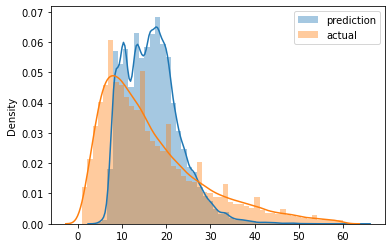

In [8]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [9]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)
        df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [10]:
df_train = read_dataframe('./data/green_tripdata_2021-01.parquet')
df_val = read_dataframe('./data/green_tripdata_2021-02.parquet')

In [11]:
len(df_train), len(df_val)

(73908, 61921)

In [12]:
df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']

In [13]:
categorical = ['PU_DO'] #'PULocationID', 'DOLocationID']
numerical = ['trip_distance']

dv = DictVectorizer()

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [14]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [15]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

7.479513631630414

In [16]:
with open('models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)

In [17]:
lr = Lasso(0.01)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

11.167275941179728